In [2]:
pip install wntr


   ---------------------------------------- 0.0/3.3 MB ? eta -:--:--
   -- ------------------------------------- 0.2/3.3 MB 5.1 MB/s eta 0:00:01
   ------ --------------------------------- 0.5/3.3 MB 6.2 MB/s eta 0:00:01
   ------------ --------------------------- 1.0/3.3 MB 9.4 MB/s eta 0:00:01
   ------------ --------------------------- 1.0/3.3 MB 9.4 MB/s eta 0:00:01
   ------------ --------------------------- 1.0/3.3 MB 9.4 MB/s eta 0:00:01
   ------------ --------------------------- 1.0/3.3 MB 9.4 MB/s eta 0:00:01
   ------------ --------------------------- 1.0/3.3 MB 9.4 MB/s eta 0:00:01
   ------------------------ --------------- 2.0/3.3 MB 6.1 MB/s eta 0:00:01
   ---------------------------------------  3.3/3.3 MB 8.9 MB/s eta 0:00:01
   ---------------------------------------- 3.3/3.3 MB 8.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------  1.7/1.7 MB 52.8 MB/s eta 0:00:01
   ---------------------

In [18]:
# Import all classes and modules that are required to simulate your WDN model.
import wntr

import wntr.metrics.economic as metrics    # This module is used for pump energy calculation.
import wntr.network.controls as controls    # This module is used to change pump operation (attack to pump).
import pandas as pd

C:\python\Python39\Lib\site-packages\wntr\epanet\io.py:2068: UserWarning: Not all curves were used in "CTOWN_D10_F_50inc.INP"; added with type None, units conversion left to user
  warnings.warn('Not all curves were used in "{}"; added with type None, units conversion left to user'.format(self.wn.name))


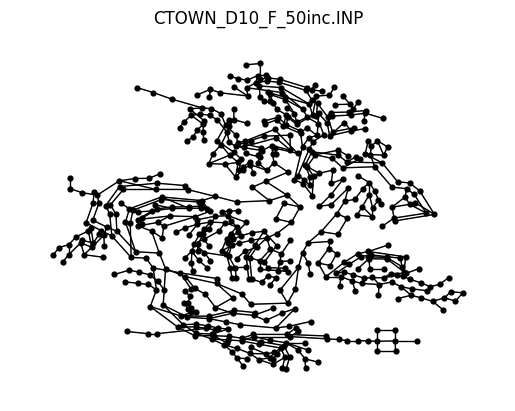

<Axes: title={'center': 'CTOWN_D10_F_50inc.INP'}>

In [29]:
# Create a water network model.

inp_file = 'CTOWN_D10_F_50inc.INP'   # Write the name of your EPANET inp file. Make sure to include the file extensino.

wn = wntr.network.WaterNetworkModel(inp_file)   # Load your inp file on WNTR model.
wn.options.hydraulic.demand_model = 'PDD'   # Your inp file would be already set as Pressure-driven analysis.

wntr.graphics.plot_network(wn, title=wn.name)  # If you want to check your WDN profile, remove # at the beginning of the code.

In [ ]:
# Run your WDN model.

sim = wntr.sim.WNTRSimulator(wn)    # This means that your will use WNTR simulator to simulate your WDN model.
results = sim.run_sim()    # Now, your WDN model run using WNTR simulator.

In [ ]:
# Get results for supplied demand, nodal head and pressure, and flowrate.

Demand = results.node["demand"]      # WNTR always uses SI units. Demand has m3/s.
Head = results.node["head"]          # Head's unit is meter.
Pressure = results.node["pressure"]  # Pressure's unit is meter (not psi.).
Flowrate = results.link["flowrate"]  # This is used to calculate pump power.

In [ ]:

# This algorithm (above) can have an error if the network inp file has a pump efficiency curve. Then, use the following algorithm.

# If a pump efficiency is defined in your inp file, use the algorithm below to calculate energy.
# But, you should provide the numerical values of average pump_efficiency - you can find it in Energy Rerpot in EPANET.


Energy = pd.DataFrame()
pump_efficiency1 = 0.70    # This should be provided.

pump1_flow = Flowrate['PU1']  # Here, '9' is the pump name. Thus, you should change this with your WND's pump name.
pump1_head = abs(Head['J285'] - Head['J273'])

power1 = 1000.0 * 9.81 * pump1_head * pump1_flow / pump_efficiency1
energy1 = power1 * wn.options.time.report_timestep

Energy["pump1_power"] = power1
Energy["pump1_energy"] = energy1



pump_efficiency1 = 0.7    # This should be provided.

pump2_flow = Flowrate['PU2']  # Here, '9' is the pump name. Thus, you should change this with your WND's pump name.
pump2_head = abs(Head['J280'] - Head['J269'])

power2 = 1000.0 * 9.81 * pump2_head * pump2_flow / pump_efficiency1
energy2 = power2 * wn.options.time.report_timestep

Energy["pump2_power"] = power2
Energy["pump2_energy"] = energy2


pump_efficiency1 = 0.7    # This should be provided.

pump3_flow = Flowrate['PU3']  # Here, '9' is the pump name. Thus, you should change this with your WND's pump name.
pump3_head = abs(Head['J276'] - Head['J274'])

power3 = 1000.0 * 9.81 * pump3_head * pump3_flow / pump_efficiency1
energy3 = power3 * wn.options.time.report_timestep

Energy["pump3_power"] = power3
Energy["pump3_energy"] = energy3


pump_efficiency1 = 0.7    # This should be provided.

pump4_flow = Flowrate['PU4']  # Here, '9' is the pump name. Thus, you should change this with your WND's pump name.
pump4_head = abs(Head['J299'] - Head['J292'])

power4 = 1000.0 * 9.81 * pump4_head * pump4_flow / pump_efficiency1
energy4 = power4 * wn.options.time.report_timestep

Energy["pump4_power"] = power4
Energy["pump4_energy"] = energy4


pump_efficiency1 = 0.7    # This should be provided.

pump5_flow = Flowrate['PU5']  # Here, '9' is the pump name. Thus, you should change this with your WND's pump name.
pump5_head = abs(Head['J300'] - Head['J256'])

power5 = 1000.0 * 9.81 * pump1_head * pump5_flow / pump_efficiency1
energy5 = power5 * wn.options.time.report_timestep

Energy["pump5_power"] = power5
Energy["pump5_energy"] = energy5


pump_efficiency1 = 0.7    # This should be provided.

pump6_flow = Flowrate['PU6']  # Here, '9' is the pump name. Thus, you should change this with your WND's pump name.
pump6_head = abs(Head['J289'] - Head['J415'])

power6 = 1000.0 * 9.81 * pump6_head * pump6_flow / pump_efficiency1
energy6 = power6 * wn.options.time.report_timestep

Energy["pump6_power"] = power6
Energy["pump6_energy"] = energy6


pump_efficiency1 = 0.7    # This should be provided.

pump7_flow = Flowrate['PU7']  # Here, '9' is the pump name. Thus, you should change this with your WND's pump name.
pump7_head = abs(Head['J290'] - Head['J291'])

power7 = 1000.0 * 9.81 * pump7_head * pump7_flow / pump_efficiency1
energy7 = power7 * wn.options.time.report_timestep

Energy["pump7_power"] = power7
Energy["pump7_energy"] = energy7


pump_efficiency1 = 0.7   # This should be provided.

pump8_flow = Flowrate['PU8']  # Here, '9' is the pump name. Thus, you should change this with your WND's pump name.
pump8_head = abs(Head['J301'] - Head['J304'])

power8 = 1000.0 * 9.81 * pump8_head * pump8_flow / pump_efficiency1
energy8 = power8 * wn.options.time.report_timestep

Energy["pump8_power"] = power8
Energy["pump8_energy"] = energy8


pump_efficiency1 = 0.7    # This should be provided.

pump9_flow = Flowrate['PU9']  # Here, '9' is the pump name. Thus, you should change this with your WND's pump name.
pump9_head = abs(Head['J302'] - Head['J306'])

power9 = 1000.0 * 9.81 * pump9_head * pump9_flow / pump_efficiency1
energy9 = power9 * wn.options.time.report_timestep

Energy["pump9_power"] = power9
Energy["pump9_energy"] = energy9


pump_efficiency1 = 0.7    # This should be provided.

pump10_flow = Flowrate['PU10']  # Here, '9' is the pump name. Thus, you should change this with your WND's pump name.
pump10_head = abs(Head['J307'] - Head['J317'])

power10 = 1000.0 * 9.81 * pump10_head * pump10_flow / pump_efficiency1
energy10 = power10 * wn.options.time.report_timestep

Energy["pump10_power"] = power10
Energy["pump10_energy"] = energy10


pump_efficiency1 = 0.7 # This should be provided.

pump11_flow = Flowrate['PU11']  # Here, '9' is the pump name. Thus, you should change this with your WND's pump name.
pump11_head = abs(Head['J309'] - Head['J323'])

power11 = 1000.0 * 9.81 * pump11_head * pump11_flow / pump_efficiency1
energy11 = power11 * wn.options.time.report_timestep

Energy["pump11_power"] = power11
Energy["pump11_energy"] = energy11

pump_efficiency1 = 0.7 # This should be provided.

pumpLWP1_flow = Flowrate['LWP1']  # Here, '9' is the pump name. Thus, you should change this with your WND's pump name.
pumpLWP1_head = abs(Head['LR1'] - Head['LT1'])

powerLWP1 = 1000.0 * 9.81 * pumpLWP1_head * pumpLWP1_flow / pump_efficiency1
energyLWP1= powerLWP1 * wn.options.time.report_timestep

Energy["pumpLWP1_power"] = powerLWP1
Energy["pumpLWP1_energy"] = energyLWP1

pump_efficiency1 = 0.7 # This should be provided.

pumpLWP2_flow = Flowrate['LWP2']  # Here, '9' is the pump name. Thus, you should change this with your WND's pump name.
pumpLWP2_head = abs(Head['LR2'] - Head['LT2'])

powerLWP2 = 1000.0 * 9.81 * pumpLWP2_head * pumpLWP2_flow / pump_efficiency1
energyLWP2= powerLWP2 * wn.options.time.report_timestep

Energy["pumpLWP2_power"] = powerLWP2
Energy["pumpLWP2_energy"] = energyLWP2

pump_efficiency1 = 0.7 # This should be provided.

pumpLWP3_flow = Flowrate['LWP3']  # Here, '9' is the pump name. Thus, you should change this with your WND's pump name.
pumpLWP3_head = abs(Head['LR3'] - Head['LT3'])

powerLWP3 = 1000.0 * 9.81 * pumpLWP3_head * pumpLWP3_flow / pump_efficiency1
energyLWP3= powerLWP3 * wn.options.time.report_timestep

Energy["pumpLWP3_power"] = powerLWP3
Energy["pumpLWP3_energy"] = energyLWP3

pump_efficiency1 = 0.7 # This should be provided.

pumpLWP4_flow = Flowrate['LWP4']  # Here, '9' is the pump name. Thus, you should change this with your WND's pump name.
pumpLWP4_head = abs(Head['LR4'] - Head['LT4'])

powerLWP4 = 1000.0 * 9.81 * pumpLWP4_head * pumpLWP4_flow / pump_efficiency1
energyLWP4= powerLWP4 * wn.options.time.report_timestep

Energy["pumpLWP4_power"] = powerLWP4
Energy["pumpLWP4_energy"] = energyLWP4

pump_efficiency1 = 0.7 # This should be provided.

pumpLWP5_flow = Flowrate['LWP5']  # Here, '9' is the pump name. Thus, you should change this with your WND's pump name.
pumpLWP5_head = abs(Head['LR5'] - Head['LT5'])

powerLWP5 = 1000.0 * 9.81 * pumpLWP5_head * pumpLWP5_flow / pump_efficiency1
energyLWP5= powerLWP5 * wn.options.time.report_timestep

Energy["pumpLWP5_power"] = powerLWP5
Energy["pumpLWP5_energy"] = energyLWP5

In [ ]:
# Export the simulation results to Excel spreadsheets.
excel_results2 = pd.ExcelWriter('wntr_results_CTOWN_D10_F_50inc.xlsx')   # An excel file is created. You can change the file name anytime.
Demand.to_excel(excel_results2, sheet_name='Demand')   # A spreadsheet for the result about supplied water to nodes
Head.to_excel(excel_results2, sheet_name='Head')       # A spreadsheet for the result about nodal hydraulic head (elevation + pressure)
Pressure.to_excel(excel_results2, sheet_name='Pressure')  # A spreadsheet for the result about nodal pressure
Energy.to_excel(excel_results2, sheet_name='Energy')     # A spreadsheet for the result about energy/power use. Here, first and second columns are power and energy, respectively.
excel_results2.close()
